# Simple inference example with CroCo-Stereo or CroCo-Flow

In [1]:
# Copyright (C) 2022-present Naver Corporation. All rights reserved.
# Licensed under CC BY-NC-SA 4.0 (non-commercial use only).

First download the model(s) of your choice by running
```
bash stereoflow/download_model.sh crocostereo.pth
bash stereoflow/download_model.sh crocoflow.pth
```

In [2]:
import torch
import numpy as np
from PIL import Image
use_gpu = torch.cuda.is_available() and torch.cuda.device_count()>0
device = torch.device('cuda:0' if use_gpu else 'cpu')
import matplotlib.pylab as plt

In [3]:
from stereoflow.test import _load_model_and_criterion
from stereoflow.engine import tiled_pred
from stereoflow.datasets_stereo import img_to_tensor, vis_disparity
from stereoflow.datasets_flow import flowToColor
tile_overlap=0.7 # recommended value, higher value can be slightly better but slower

Warning, cannot find cuda-compiled version of RoPE2D, using a slow pytorch version instead


### CroCo-Stereo example

In [4]:
image1 = np.asarray(Image.open('/home/tatiana/chris-sem-prj/ETH-Semester-Project/debug/infer_masked_image.png'))
image2 = np.asarray(Image.open('/home/tatiana/chris-sem-prj/ETH-Semester-Project/bop_datasets/templates/v2/lmo/1/rgb/template_0392.png'))

In [5]:
model, _, cropsize, with_conf, task, tile_conf_mode = _load_model_and_criterion('stereoflow_models/crocostereo.pth', None, device)

loading model from stereoflow_models/crocostereo.pth


/home/tatiana/chris-sem-prj/ETH-Semester-Project/external/crocov2/stereoflow/test.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(model_path, 'cpu')


head: PixelwiseTaskWithDPT()
croco_args: {'enc_embed_dim': 1024, 'enc_depth': 24, 'enc_num_heads': 16, 'dec_embed_dim': 768, 'dec_num_heads': 12, 'dec_depth': 12, 'img_size': (352, 704), 'pos_embed': 'RoPE100'}
pos_embed
RoPE100
  PixelwiseTaskWithDPT: automatically setting hook_idxs=[5, 11, 17, 23]


RuntimeError: Error(s) in loading state_dict for CroCoDownstreamMonocularEncoder:
	Unexpected key(s) in state_dict: "decoder_embed.weight", "decoder_embed.bias", "dec_blocks.0.norm1.weight", "dec_blocks.0.norm1.bias", "dec_blocks.0.attn.qkv.weight", "dec_blocks.0.attn.qkv.bias", "dec_blocks.0.attn.proj.weight", "dec_blocks.0.attn.proj.bias", "dec_blocks.0.cross_attn.projq.weight", "dec_blocks.0.cross_attn.projq.bias", "dec_blocks.0.cross_attn.projk.weight", "dec_blocks.0.cross_attn.projk.bias", "dec_blocks.0.cross_attn.projv.weight", "dec_blocks.0.cross_attn.projv.bias", "dec_blocks.0.cross_attn.proj.weight", "dec_blocks.0.cross_attn.proj.bias", "dec_blocks.0.norm2.weight", "dec_blocks.0.norm2.bias", "dec_blocks.0.norm3.weight", "dec_blocks.0.norm3.bias", "dec_blocks.0.mlp.fc1.weight", "dec_blocks.0.mlp.fc1.bias", "dec_blocks.0.mlp.fc2.weight", "dec_blocks.0.mlp.fc2.bias", "dec_blocks.0.norm_y.weight", "dec_blocks.0.norm_y.bias", "dec_blocks.1.norm1.weight", "dec_blocks.1.norm1.bias", "dec_blocks.1.attn.qkv.weight", "dec_blocks.1.attn.qkv.bias", "dec_blocks.1.attn.proj.weight", "dec_blocks.1.attn.proj.bias", "dec_blocks.1.cross_attn.projq.weight", "dec_blocks.1.cross_attn.projq.bias", "dec_blocks.1.cross_attn.projk.weight", "dec_blocks.1.cross_attn.projk.bias", "dec_blocks.1.cross_attn.projv.weight", "dec_blocks.1.cross_attn.projv.bias", "dec_blocks.1.cross_attn.proj.weight", "dec_blocks.1.cross_attn.proj.bias", "dec_blocks.1.norm2.weight", "dec_blocks.1.norm2.bias", "dec_blocks.1.norm3.weight", "dec_blocks.1.norm3.bias", "dec_blocks.1.mlp.fc1.weight", "dec_blocks.1.mlp.fc1.bias", "dec_blocks.1.mlp.fc2.weight", "dec_blocks.1.mlp.fc2.bias", "dec_blocks.1.norm_y.weight", "dec_blocks.1.norm_y.bias", "dec_blocks.2.norm1.weight", "dec_blocks.2.norm1.bias", "dec_blocks.2.attn.qkv.weight", "dec_blocks.2.attn.qkv.bias", "dec_blocks.2.attn.proj.weight", "dec_blocks.2.attn.proj.bias", "dec_blocks.2.cross_attn.projq.weight", "dec_blocks.2.cross_attn.projq.bias", "dec_blocks.2.cross_attn.projk.weight", "dec_blocks.2.cross_attn.projk.bias", "dec_blocks.2.cross_attn.projv.weight", "dec_blocks.2.cross_attn.projv.bias", "dec_blocks.2.cross_attn.proj.weight", "dec_blocks.2.cross_attn.proj.bias", "dec_blocks.2.norm2.weight", "dec_blocks.2.norm2.bias", "dec_blocks.2.norm3.weight", "dec_blocks.2.norm3.bias", "dec_blocks.2.mlp.fc1.weight", "dec_blocks.2.mlp.fc1.bias", "dec_blocks.2.mlp.fc2.weight", "dec_blocks.2.mlp.fc2.bias", "dec_blocks.2.norm_y.weight", "dec_blocks.2.norm_y.bias", "dec_blocks.3.norm1.weight", "dec_blocks.3.norm1.bias", "dec_blocks.3.attn.qkv.weight", "dec_blocks.3.attn.qkv.bias", "dec_blocks.3.attn.proj.weight", "dec_blocks.3.attn.proj.bias", "dec_blocks.3.cross_attn.projq.weight", "dec_blocks.3.cross_attn.projq.bias", "dec_blocks.3.cross_attn.projk.weight", "dec_blocks.3.cross_attn.projk.bias", "dec_blocks.3.cross_attn.projv.weight", "dec_blocks.3.cross_attn.projv.bias", "dec_blocks.3.cross_attn.proj.weight", "dec_blocks.3.cross_attn.proj.bias", "dec_blocks.3.norm2.weight", "dec_blocks.3.norm2.bias", "dec_blocks.3.norm3.weight", "dec_blocks.3.norm3.bias", "dec_blocks.3.mlp.fc1.weight", "dec_blocks.3.mlp.fc1.bias", "dec_blocks.3.mlp.fc2.weight", "dec_blocks.3.mlp.fc2.bias", "dec_blocks.3.norm_y.weight", "dec_blocks.3.norm_y.bias", "dec_blocks.4.norm1.weight", "dec_blocks.4.norm1.bias", "dec_blocks.4.attn.qkv.weight", "dec_blocks.4.attn.qkv.bias", "dec_blocks.4.attn.proj.weight", "dec_blocks.4.attn.proj.bias", "dec_blocks.4.cross_attn.projq.weight", "dec_blocks.4.cross_attn.projq.bias", "dec_blocks.4.cross_attn.projk.weight", "dec_blocks.4.cross_attn.projk.bias", "dec_blocks.4.cross_attn.projv.weight", "dec_blocks.4.cross_attn.projv.bias", "dec_blocks.4.cross_attn.proj.weight", "dec_blocks.4.cross_attn.proj.bias", "dec_blocks.4.norm2.weight", "dec_blocks.4.norm2.bias", "dec_blocks.4.norm3.weight", "dec_blocks.4.norm3.bias", "dec_blocks.4.mlp.fc1.weight", "dec_blocks.4.mlp.fc1.bias", "dec_blocks.4.mlp.fc2.weight", "dec_blocks.4.mlp.fc2.bias", "dec_blocks.4.norm_y.weight", "dec_blocks.4.norm_y.bias", "dec_blocks.5.norm1.weight", "dec_blocks.5.norm1.bias", "dec_blocks.5.attn.qkv.weight", "dec_blocks.5.attn.qkv.bias", "dec_blocks.5.attn.proj.weight", "dec_blocks.5.attn.proj.bias", "dec_blocks.5.cross_attn.projq.weight", "dec_blocks.5.cross_attn.projq.bias", "dec_blocks.5.cross_attn.projk.weight", "dec_blocks.5.cross_attn.projk.bias", "dec_blocks.5.cross_attn.projv.weight", "dec_blocks.5.cross_attn.projv.bias", "dec_blocks.5.cross_attn.proj.weight", "dec_blocks.5.cross_attn.proj.bias", "dec_blocks.5.norm2.weight", "dec_blocks.5.norm2.bias", "dec_blocks.5.norm3.weight", "dec_blocks.5.norm3.bias", "dec_blocks.5.mlp.fc1.weight", "dec_blocks.5.mlp.fc1.bias", "dec_blocks.5.mlp.fc2.weight", "dec_blocks.5.mlp.fc2.bias", "dec_blocks.5.norm_y.weight", "dec_blocks.5.norm_y.bias", "dec_blocks.6.norm1.weight", "dec_blocks.6.norm1.bias", "dec_blocks.6.attn.qkv.weight", "dec_blocks.6.attn.qkv.bias", "dec_blocks.6.attn.proj.weight", "dec_blocks.6.attn.proj.bias", "dec_blocks.6.cross_attn.projq.weight", "dec_blocks.6.cross_attn.projq.bias", "dec_blocks.6.cross_attn.projk.weight", "dec_blocks.6.cross_attn.projk.bias", "dec_blocks.6.cross_attn.projv.weight", "dec_blocks.6.cross_attn.projv.bias", "dec_blocks.6.cross_attn.proj.weight", "dec_blocks.6.cross_attn.proj.bias", "dec_blocks.6.norm2.weight", "dec_blocks.6.norm2.bias", "dec_blocks.6.norm3.weight", "dec_blocks.6.norm3.bias", "dec_blocks.6.mlp.fc1.weight", "dec_blocks.6.mlp.fc1.bias", "dec_blocks.6.mlp.fc2.weight", "dec_blocks.6.mlp.fc2.bias", "dec_blocks.6.norm_y.weight", "dec_blocks.6.norm_y.bias", "dec_blocks.7.norm1.weight", "dec_blocks.7.norm1.bias", "dec_blocks.7.attn.qkv.weight", "dec_blocks.7.attn.qkv.bias", "dec_blocks.7.attn.proj.weight", "dec_blocks.7.attn.proj.bias", "dec_blocks.7.cross_attn.projq.weight", "dec_blocks.7.cross_attn.projq.bias", "dec_blocks.7.cross_attn.projk.weight", "dec_blocks.7.cross_attn.projk.bias", "dec_blocks.7.cross_attn.projv.weight", "dec_blocks.7.cross_attn.projv.bias", "dec_blocks.7.cross_attn.proj.weight", "dec_blocks.7.cross_attn.proj.bias", "dec_blocks.7.norm2.weight", "dec_blocks.7.norm2.bias", "dec_blocks.7.norm3.weight", "dec_blocks.7.norm3.bias", "dec_blocks.7.mlp.fc1.weight", "dec_blocks.7.mlp.fc1.bias", "dec_blocks.7.mlp.fc2.weight", "dec_blocks.7.mlp.fc2.bias", "dec_blocks.7.norm_y.weight", "dec_blocks.7.norm_y.bias", "dec_blocks.8.norm1.weight", "dec_blocks.8.norm1.bias", "dec_blocks.8.attn.qkv.weight", "dec_blocks.8.attn.qkv.bias", "dec_blocks.8.attn.proj.weight", "dec_blocks.8.attn.proj.bias", "dec_blocks.8.cross_attn.projq.weight", "dec_blocks.8.cross_attn.projq.bias", "dec_blocks.8.cross_attn.projk.weight", "dec_blocks.8.cross_attn.projk.bias", "dec_blocks.8.cross_attn.projv.weight", "dec_blocks.8.cross_attn.projv.bias", "dec_blocks.8.cross_attn.proj.weight", "dec_blocks.8.cross_attn.proj.bias", "dec_blocks.8.norm2.weight", "dec_blocks.8.norm2.bias", "dec_blocks.8.norm3.weight", "dec_blocks.8.norm3.bias", "dec_blocks.8.mlp.fc1.weight", "dec_blocks.8.mlp.fc1.bias", "dec_blocks.8.mlp.fc2.weight", "dec_blocks.8.mlp.fc2.bias", "dec_blocks.8.norm_y.weight", "dec_blocks.8.norm_y.bias", "dec_blocks.9.norm1.weight", "dec_blocks.9.norm1.bias", "dec_blocks.9.attn.qkv.weight", "dec_blocks.9.attn.qkv.bias", "dec_blocks.9.attn.proj.weight", "dec_blocks.9.attn.proj.bias", "dec_blocks.9.cross_attn.projq.weight", "dec_blocks.9.cross_attn.projq.bias", "dec_blocks.9.cross_attn.projk.weight", "dec_blocks.9.cross_attn.projk.bias", "dec_blocks.9.cross_attn.projv.weight", "dec_blocks.9.cross_attn.projv.bias", "dec_blocks.9.cross_attn.proj.weight", "dec_blocks.9.cross_attn.proj.bias", "dec_blocks.9.norm2.weight", "dec_blocks.9.norm2.bias", "dec_blocks.9.norm3.weight", "dec_blocks.9.norm3.bias", "dec_blocks.9.mlp.fc1.weight", "dec_blocks.9.mlp.fc1.bias", "dec_blocks.9.mlp.fc2.weight", "dec_blocks.9.mlp.fc2.bias", "dec_blocks.9.norm_y.weight", "dec_blocks.9.norm_y.bias", "dec_blocks.10.norm1.weight", "dec_blocks.10.norm1.bias", "dec_blocks.10.attn.qkv.weight", "dec_blocks.10.attn.qkv.bias", "dec_blocks.10.attn.proj.weight", "dec_blocks.10.attn.proj.bias", "dec_blocks.10.cross_attn.projq.weight", "dec_blocks.10.cross_attn.projq.bias", "dec_blocks.10.cross_attn.projk.weight", "dec_blocks.10.cross_attn.projk.bias", "dec_blocks.10.cross_attn.projv.weight", "dec_blocks.10.cross_attn.projv.bias", "dec_blocks.10.cross_attn.proj.weight", "dec_blocks.10.cross_attn.proj.bias", "dec_blocks.10.norm2.weight", "dec_blocks.10.norm2.bias", "dec_blocks.10.norm3.weight", "dec_blocks.10.norm3.bias", "dec_blocks.10.mlp.fc1.weight", "dec_blocks.10.mlp.fc1.bias", "dec_blocks.10.mlp.fc2.weight", "dec_blocks.10.mlp.fc2.bias", "dec_blocks.10.norm_y.weight", "dec_blocks.10.norm_y.bias", "dec_blocks.11.norm1.weight", "dec_blocks.11.norm1.bias", "dec_blocks.11.attn.qkv.weight", "dec_blocks.11.attn.qkv.bias", "dec_blocks.11.attn.proj.weight", "dec_blocks.11.attn.proj.bias", "dec_blocks.11.cross_attn.projq.weight", "dec_blocks.11.cross_attn.projq.bias", "dec_blocks.11.cross_attn.projk.weight", "dec_blocks.11.cross_attn.projk.bias", "dec_blocks.11.cross_attn.projv.weight", "dec_blocks.11.cross_attn.projv.bias", "dec_blocks.11.cross_attn.proj.weight", "dec_blocks.11.cross_attn.proj.bias", "dec_blocks.11.norm2.weight", "dec_blocks.11.norm2.bias", "dec_blocks.11.norm3.weight", "dec_blocks.11.norm3.bias", "dec_blocks.11.mlp.fc1.weight", "dec_blocks.11.mlp.fc1.bias", "dec_blocks.11.mlp.fc2.weight", "dec_blocks.11.mlp.fc2.bias", "dec_blocks.11.norm_y.weight", "dec_blocks.11.norm_y.bias", "dec_norm.weight", "dec_norm.bias". 
	size mismatch for head.dpt.act_2_postprocess.0.weight: copying a param with shape torch.Size([192, 768, 1, 1]) from checkpoint, the shape in current model is torch.Size([192, 1024, 1, 1]).
	size mismatch for head.dpt.act_3_postprocess.0.weight: copying a param with shape torch.Size([384, 768, 1, 1]) from checkpoint, the shape in current model is torch.Size([384, 1024, 1, 1]).
	size mismatch for head.dpt.act_4_postprocess.0.weight: copying a param with shape torch.Size([768, 768, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 1024, 1, 1]).
	size mismatch for head.dpt.act_postprocess.1.0.weight: copying a param with shape torch.Size([192, 768, 1, 1]) from checkpoint, the shape in current model is torch.Size([192, 1024, 1, 1]).
	size mismatch for head.dpt.act_postprocess.2.0.weight: copying a param with shape torch.Size([384, 768, 1, 1]) from checkpoint, the shape in current model is torch.Size([384, 1024, 1, 1]).
	size mismatch for head.dpt.act_postprocess.3.0.weight: copying a param with shape torch.Size([768, 768, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 1024, 1, 1]).

In [44]:
im1 = img_to_tensor(image1).to(device).unsqueeze(0)
im2 = img_to_tensor(image2).to(device).unsqueeze(0)

with torch.inference_mode():
    pred, _, _ = tiled_pred(model, None, im1, im2, None, conf_mode=tile_conf_mode, overlap=tile_overlap, crop=cropsize, with_conf=with_conf, return_time=False)
pred = pred.squeeze(0).squeeze(0).cpu().numpy()

(-0.5, 479.5, 479.5, -0.5)

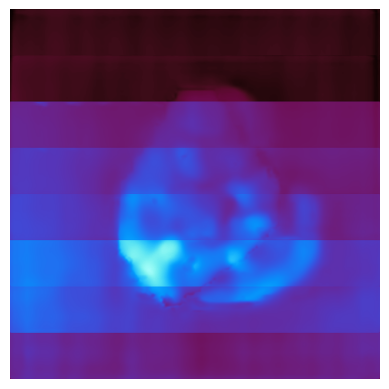

In [45]:
plt.imshow(vis_disparity(pred))
plt.axis('off')

### CroCo-Flow example

In [36]:
image1 = np.asarray(Image.open('/home/tatiana/chris-sem-prj/ETH-Semester-Project/1.png'))
image2 = np.asarray(Image.open('/home/tatiana/chris-sem-prj/ETH-Semester-Project/2.png'))

In [37]:
model, _, cropsize, with_conf, task, tile_conf_mode = _load_model_and_criterion('stereoflow_models/crocoflow.pth', None, device)


loading model from stereoflow_models/crocoflow.pth
head: PixelwiseTaskWithDPT()
croco_args: {'enc_embed_dim': 1024, 'enc_depth': 24, 'enc_num_heads': 16, 'dec_embed_dim': 768, 'dec_num_heads': 12, 'dec_depth': 12, 'img_size': (320, 384), 'pos_embed': 'RoPE100'}
pos_embed
RoPE100
  PixelwiseTaskWithDPT: automatically setting hook_idxs=[23, 27, 31, 35]


In [38]:
im1 = img_to_tensor(image1).to(device).unsqueeze(0)
im2 = img_to_tensor(image2).to(device).unsqueeze(0)
with torch.inference_mode():
    pred, _, _ = tiled_pred(model, None, im1, im2, None, conf_mode=tile_conf_mode, overlap=tile_overlap, crop=cropsize, with_conf=with_conf, return_time=False)
pred = pred.squeeze(0).permute(1,2,0).cpu().numpy()

(-0.5, 2987.5, 2007.5, -0.5)

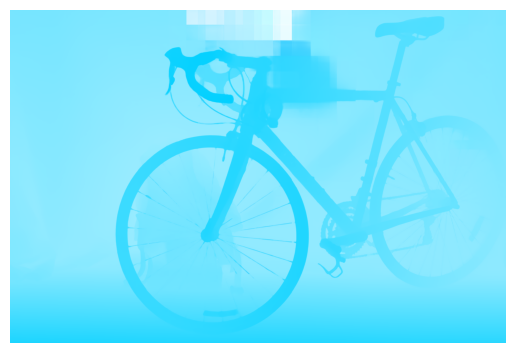

In [39]:
plt.imshow(flowToColor(pred))
plt.axis('off')